In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import KernelPCA
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, NuSVR
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.covariance import empirical_covariance
import statsmodels.api as sm

In [281]:
near_jako_11 = pd.read_csv('jakobshavn11.csv')
near_jako_12 = pd.read_csv('jakobshavn12.csv')
near_jako_13 = pd.read_csv('jakobshavn13.csv')
near_jako_14 = pd.read_csv('jakobshavn14.csv')
near_jako_15 = pd.read_csv('jakobshavn15.csv')
near_jako_16 = pd.read_csv('jakobshavn16.csv')
near_south_11 = pd.read_csv('southeast11.csv')
near_south_12 = pd.read_csv('southeast12.csv')
near_south_13 = pd.read_csv('southeast13.csv')
near_south_14 = pd.read_csv('southeast14.csv')
near_south_15 = pd.read_csv('southeast15.csv')
near_south_16 = pd.read_csv('southeast16.csv')
near_stor_11 = pd.read_csv('storstrommen11.csv')
near_stor_12 = pd.read_csv('storstrommen12.csv')
near_stor_13 = pd.read_csv('storstrommen13.csv')
near_stor_14 = pd.read_csv('storstrommen14.csv')
near_stor_15 = pd.read_csv('storstrommen15.csv')
near_stor_16 = pd.read_csv('storstrommen16.csv')

near_jako = pd.concat([near_jako_11, near_jako_12, near_jako_13, 
                      near_jako_14, near_jako_15, near_jako_16])
near_south = pd.concat([near_south_11, near_south_12, near_south_13, 
                       near_south_14, near_south_15, near_south_16])
near_stor = pd.concat([near_stor_11, near_stor_12, near_stor_13, 
                      near_stor_14, near_stor_15, near_stor_16])

near_df = pd.concat([near_jako, near_south, near_stor])

In [282]:
print(near_df.columns)

Index(['Unnamed: 0', 'Coh_Swath', 'Coh_SwathOverPoca', 'DayInYear_Swath',
       'DemDiffMad_Swath', 'DemDiff_Swath', 'DemDiff_SwathOverPoca',
       'Dist_SwathToPoca', 'Elev_Oib', 'Elev_Swath', 'Heading_Swath',
       'Lat_Swath', 'LeadEdgeS_Poca', 'LeadEdgeW_Poca', 'Lon_Swath',
       'MeanDiffSpread_Swath', 'PhaseConfidence_Swath', 'PhaseSSegment_Swath',
       'Phase_Swath', 'Phase_SwathOverPoca', 'PowerScaled_Swath',
       'PowerScaled_SwathOverPoca', 'PowerWatt_Swath', 'SampleNb_Swath',
       'SampleNb_SwathMinusLeadEdgeS', 'StartTime_Swath', 'Wf_Number_Swath',
       'X_Swath', 'Y_Swath'],
      dtype='object')


In [283]:
ref_feature = near_df[['DemDiff_Swath', 
                       'DemDiffMad_Swath', 
                      'DemDiff_SwathOverPoca', 
                      'MeanDiffSpread_Swath']]

In [284]:
demdiff = np.array(ref_feature['DemDiff_Swath'])
demdiff_mad = np.array(ref_feature['DemDiffMad_Swath'])
demdiff_sop = np.array(ref_feature['DemDiff_SwathOverPoca'])
diffspread_mean = np.array(ref_feature['MeanDiffSpread_Swath'])

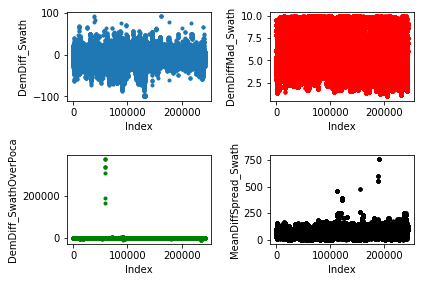

In [286]:
plt.subplot(2, 2, 1)
plt.plot(demdiff, '.')
plt.ylabel('DemDiff_Swath') 
plt.xlabel('Index')
plt.subplot(2, 2, 2)
plt.plot(demdiff_mad, '.', color = 'r')
plt.ylabel('DemDiffMad_Swath')
plt.xlabel('Index')
plt.subplot(2, 2, 3)
plt.plot(demdiff_sop, '.', color = 'g')
plt.ylabel('DemDiff_SwathOverPoca')
plt.xlabel('Index')
plt.subplot(2, 2, 4)
plt.plot(diffspread_mean, '.', color = 'k')
plt.ylabel('MeanDiffSpread_Swath')
plt.xlabel('Index')
plt.tight_layout()
plt.savefig('Figure_1_near')
plt.show()

In [10]:
near_df_cle = near_df[(near_df['DemDiff_Swath']>-50)&
                      (near_df['DemDiff_Swath']<25)&
                      (near_df['DemDiff_SwathOverPoca']<100000)&
                      (near_df['MeanDiffSpread_Swath']<200)]

In [11]:
print(near_df_cle.shape)

(236946, 29)


In [12]:
demdiff_new = np.array(near_df_cle['DemDiff_Swath'])
demdiff_mad_new = np.array(near_df_cle['DemDiffMad_Swath'])
demdiff_sop_new = np.array(near_df_cle['DemDiff_SwathOverPoca'])
diffspread_mean_new = np.array(near_df_cle['MeanDiffSpread_Swath'])

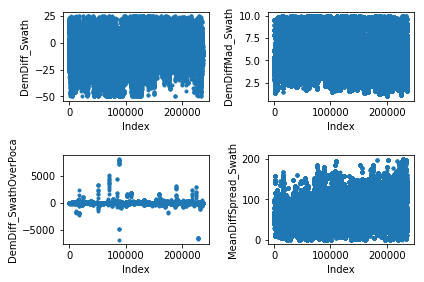

In [13]:
plt.subplot(2, 2, 1)
plt.plot(demdiff_new, '.')
plt.ylabel('DemDiff_Swath') 
plt.xlabel('Index')
plt.subplot(2, 2, 2)
plt.plot(demdiff_mad_new, '.')
plt.ylabel('DemDiffMad_Swath')
plt.xlabel('Index')
plt.subplot(2, 2, 3)
plt.plot(demdiff_sop_new, '.')
plt.ylabel('DemDiff_SwathOverPoca')
plt.xlabel('Index')
plt.subplot(2, 2, 4)
plt.plot(diffspread_mean_new, '.')
plt.ylabel('MeanDiffSpread_Swath')
plt.xlabel('Index')
plt.tight_layout()
plt.show()

In [14]:
feature = near_df_cle[['Coh_Swath', 
                       'Coh_SwathOverPoca', 
                       'DayInYear_Swath',
                       'Dist_SwathToPoca', 
                       'Heading_Swath',
                       'LeadEdgeS_Poca', 
                       'LeadEdgeW_Poca',
                       'PhaseConfidence_Swath', 
                       'PhaseSSegment_Swath',
                       'Phase_Swath', 
                       'Phase_SwathOverPoca', 
                       'PowerScaled_Swath',
                       'PowerScaled_SwathOverPoca', 
                       'PowerWatt_Swath', 
                       'SampleNb_Swath',
                       'SampleNb_SwathMinusLeadEdgeS']]

target = near_df_cle['Elev_Oib'] - near_df_cle['Elev_Swath']
target_div = near_df_cle['Elev_Oib'] / near_df_cle['Elev_Swath']

In [15]:
div_ele = np.array(target_div)
diff_ele = np.array(target)
coh = np.array(feature['Coh_Swath'])
coh_sop = np.array(feature['Coh_SwathOverPoca'])
day = np.array(feature['DayInYear_Swath'])
dist_sop = np.array(feature['Dist_SwathToPoca'])
head = np.array(feature['Heading_Swath'])
leads = np.array(feature['LeadEdgeS_Poca'])
leadw = np.array(feature['LeadEdgeW_Poca'])
phasecon = np.array(feature['PhaseConfidence_Swath'])
phasess = np.array(feature['PhaseSSegment_Swath'])
phase = np.array(feature['Phase_Swath'])
phase_sop = np.array(feature['Phase_SwathOverPoca'])
power = np.array(feature['PowerScaled_Swath'])
power_sop = np.array(feature['PowerScaled_SwathOverPoca'])
powerw = np.array(feature['PowerWatt_Swath'])
samplenb = np.array(feature['SampleNb_Swath'])
samplenb_sml = np.array(feature['SampleNb_SwathMinusLeadEdgeS'])

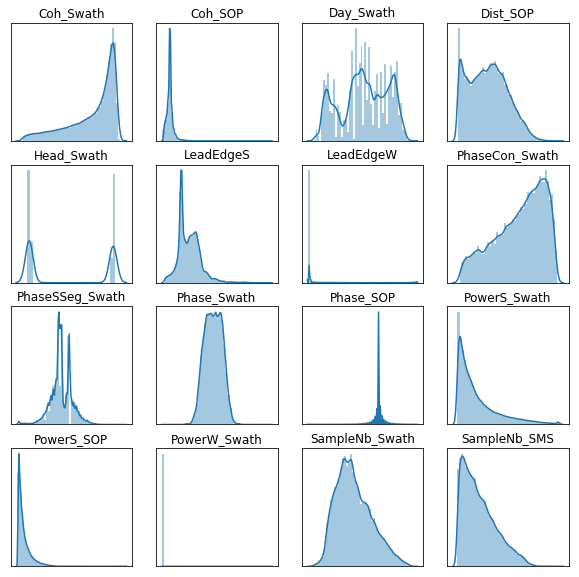

In [299]:
plt.figure(figsize = (10, 10))
plt.subplot(4, 4, 1)
sns.distplot(coh)
plt.xticks([])
plt.yticks([])
plt.title('Coh_Swath')
plt.subplot(4, 4, 2)
sns.distplot(coh_sop)
plt.xticks([])
plt.yticks([])
plt.title('Coh_SOP')
plt.subplot(4, 4, 3)
sns.distplot(day)
plt.xticks([])
plt.yticks([])
plt.title('Day_Swath')
plt.subplot(4, 4 ,4)
sns.distplot(dist_sop)
plt.xticks([])
plt.yticks([])
plt.title('Dist_SOP')
plt.subplot(4, 4, 5)
sns.distplot(head)
plt.xticks([])
plt.yticks([])
plt.title('Head_Swath')
plt.subplot(4, 4, 6)
sns.distplot(leads)
plt.xticks([])
plt.yticks([])
plt.title('LeadEdgeS')
plt.subplot(4, 4, 7)
sns.distplot(leadw)
plt.xticks([])
plt.yticks([])
plt.title('LeadEdgeW')
plt.subplot(4, 4, 8)
sns.distplot(phasecon)
plt.xticks([])
plt.yticks([])
plt.title('PhaseCon_Swath')
plt.subplot(4, 4, 9)
sns.distplot(phasess)
plt.xticks([])
plt.yticks([])
plt.title('PhaseSSeg_Swath')
plt.subplot(4, 4, 10)
sns.distplot(phase)
plt.xticks([])
plt.yticks([])
plt.title('Phase_Swath')
plt.subplot(4, 4, 11)
sns.distplot(phase_sop)
plt.xticks([])
plt.yticks([])
plt.title('Phase_SOP')
plt.subplot(4, 4, 12)
sns.distplot(power)
plt.xticks([])
plt.yticks([])
plt.title('PowerS_Swath')
plt.subplot(4, 4, 13)
sns.distplot(power_sop)
plt.xticks([])
plt.yticks([])
plt.title('PowerS_SOP')
plt.subplot(4, 4, 14)
sns.distplot(powerw)
plt.xticks([])
plt.yticks([])
plt.title('PowerW_Swath')
plt.subplot(4, 4, 15)
sns.distplot(samplenb)
plt.xticks([])
plt.yticks([])
plt.title('SampleNb_Swath')
plt.subplot(4, 4, 16)
sns.distplot(samplenb_sml)
plt.xticks([])
plt.yticks([])
plt.title('SampleNb_SMS')
plt.savefig('Figure_2_near')
plt.show()

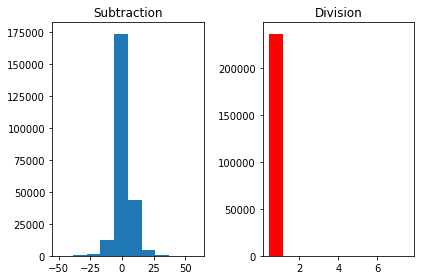

In [291]:
plt.subplot(1, 2, 1)
plt.hist(diff_ele)
plt.title('Subtraction')
plt.subplot(1, 2, 2)
plt.hist(div_ele, color = 'r')
plt.title('Division')
plt.tight_layout()
plt.savefig('Figure_3_near')
plt.show()

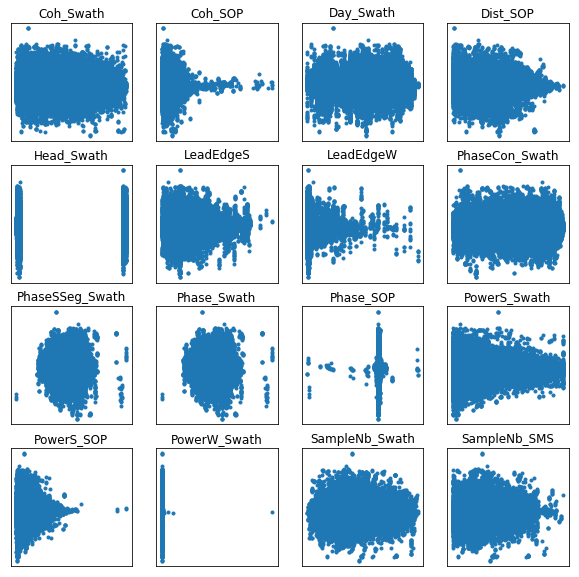

In [298]:
plt.figure(figsize = (10, 10))
plt.subplot(4, 4, 1)
plt.plot(coh, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Coh_Swath')
plt.subplot(4, 4, 2)
plt.plot(coh_sop, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Coh_SOP')
plt.subplot(4, 4, 3)
plt.plot(day, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Day_Swath')
plt.subplot(4, 4 ,4)
plt.plot(dist_sop, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Dist_SOP')
plt.subplot(4, 4, 5)
plt.plot(head, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Head_Swath')
plt.subplot(4, 4, 6)
plt.plot(leads, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('LeadEdgeS')
plt.subplot(4, 4, 7)
plt.plot(leadw, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('LeadEdgeW')
plt.subplot(4, 4, 8)
plt.plot(phasecon, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PhaseCon_Swath')
plt.subplot(4, 4, 9)
plt.plot(phase, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PhaseSSeg_Swath')
plt.subplot(4, 4, 10)
plt.plot(phase, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Phase_Swath')
plt.subplot(4, 4, 11)
plt.plot(phase_sop, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Phase_SOP')
plt.subplot(4, 4, 12)
plt.plot(power, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PowerS_Swath')
plt.subplot(4, 4, 13)
plt.plot(power_sop, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PowerS_SOP')
plt.subplot(4, 4, 14)
plt.plot(powerw, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PowerW_Swath')
plt.subplot(4, 4, 15)
plt.plot(samplenb, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('SampleNb_Swath')
plt.subplot(4, 4, 16)
plt.plot(samplenb_sml, diff_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('SampleNb_SMS')
plt.savefig('Figure_4_near')
plt.show()

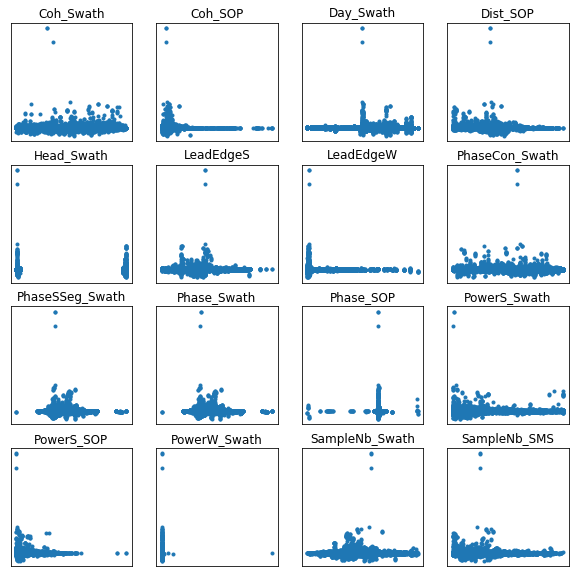

In [300]:
plt.figure(figsize = (10, 10))
plt.subplot(4, 4, 1)
plt.plot(coh, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Coh_Swath')
plt.subplot(4, 4, 2)
plt.plot(coh_sop, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Coh_SOP')
plt.subplot(4, 4, 3)
plt.plot(day, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Day_Swath')
plt.subplot(4, 4 ,4)
plt.plot(dist_sop, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Dist_SOP')
plt.subplot(4, 4, 5)
plt.plot(head, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Head_Swath')
plt.subplot(4, 4, 6)
plt.plot(leads, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('LeadEdgeS')
plt.subplot(4, 4, 7)
plt.plot(leadw, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('LeadEdgeW')
plt.subplot(4, 4, 8)
plt.plot(phasecon, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PhaseCon_Swath')
plt.subplot(4, 4, 9)
plt.plot(phase, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PhaseSSeg_Swath')
plt.subplot(4, 4, 10)
plt.plot(phase, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Phase_Swath')
plt.subplot(4, 4, 11)
plt.plot(phase_sop, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('Phase_SOP')
plt.subplot(4, 4, 12)
plt.plot(power, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PowerS_Swath')
plt.subplot(4, 4, 13)
plt.plot(power_sop, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PowerS_SOP')
plt.subplot(4, 4, 14)
plt.plot(powerw, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('PowerW_Swath')
plt.subplot(4, 4, 15)
plt.plot(samplenb, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('SampleNb_Swath')
plt.subplot(4, 4, 16)
plt.plot(samplenb_sml, div_ele, '.')
plt.xticks([])
plt.yticks([])
plt.title('SampleNb_SMS')
plt.savefig('Figure_5_near')
plt.show()

In [311]:
stand_trans = MinMaxScaler().fit_transform(np.array(feature))
target_trans = np.array(target)

In [21]:
print(stand_trans.shape)

(236946, 16)


In [330]:
X, X_test, y, y_test = train_test_split(stand_trans, target_trans, test_size = 0.3)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
X_train_small, X_val_small, y_train_small, y_val_small = train_test_split(X_train, y_train, test_size = 0.5)

In [31]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(132689, 16)
(33173, 16)
(71084, 16)
(132689,)
(33173,)
(71084,)


In [48]:
X_train_const = sm.add_constant(X_train)
model_lm = sm.OLS(y_train, X_train_const).fit()
model_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 03 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:24:33   Log-Likelihood:            -4.2131e+05
No. Observations:              132689   AIC:                         8.426e+05
Df Residuals:                  132673   BIC:                         8.428e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0514      1.459      0.720      0.471      -1.809       3.912
x1            -1.8458      0.087    -21.337      0.000      -2.015      -1.676
x2            -1.4961      0.565     -2.650      0.008      -2.603      -0.390
x3            -0.3938      0.070     -5.606      0.000      -0.532      -0.256
x4            -5.0179      0.144    -34.864      0.000      -5.300      -4.736
x5            -0.5077      0.036    -14.194      0.000      -0.578      -0.438
x6            -1.3684      0.121    -11.293      0.000      -1.606      -1.131
x7            -3.4338      0.490     -7.005      0.000      -4.395      -2.473
x8             0.1157      0.064      1.820      0.069      -0.009       0.240
x9             0.1274      0.160      0.795      0.427      -0.187       0.442
x10            1.6211      0.206      7.886      0.000       1.218       2.024
x11            3.3804      2.252      1.501      0.133      -1.033       7.794
x12           -2.0552      0.183    -11.203      0.000      -2.415      -1.696
x13            3.7544      0.615      6.103      0.000       2.549       4.960
x14         -156.6181     75.702     -2.069      0.039    -304.992      -8.244
x15            1.8580      0.083     22.343      0.000       1.695       2.021
x16            3.1446      0.113     27.851      0.000       2.923       3.366
==============================================================================
Omnibus:                    18679.530   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           244459.936
Skew:                          -0.196   Prob(JB):                         0.00
Kurtosis:                       9.638   Cond. No.                     4.95e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.96e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
X_val_const = sm.add_constant(X_val)
ypred_lm = model_lm.predict(X_val_const)
mse_lm = mean_squared_error(ypred_lm, y_val)

In [52]:
print(mse_lm)

33.491185535047634


In [59]:
model_l1 = Lasso(alpha = 1)
model_l1_fit = model_l1.fit(X_train, y_train)
feature_selec_l1 = SelectFromModel(model_l1_fit, prefit = True)

In [60]:
feature_l1 = feature_selec_l1.get_support(indices = True)
print(feature.columns[feature_l1])

Index([], dtype='object')


In [61]:
model_linearSVR = LinearSVR()
model_linearSVR_fit = model_linearSVR.fit(X_train, y_train)
feature_selec_svr = SelectFromModel(model_linearSVR_fit, prefit = True)

In [62]:
feature_svr = feature_selec_svr.get_support(indices = True)
print(feature.columns[feature_svr])

Index(['Coh_Swath', 'Dist_SwathToPoca', 'LeadEdgeW_Poca', 'Phase_Swath',
       'PowerScaled_Swath', 'PowerScaled_SwathOverPoca',
       'SampleNb_SwathMinusLeadEdgeS'],
      dtype='object')


In [63]:
X_train_svr = feature_selec_svr.transform(X_train)
X_val_svr = feature_selec_svr.transform(X_val)

In [64]:
model_linearSVR_fit = model_linearSVR.fit(X_train_svr, y_train)
ypred_linearSVR = model_linearSVR_fit.predict(X_val_svr)
mse_linearSVR = mean_squared_error(ypred_linearSVR, y_val)

In [65]:
print(mse_linearSVR)

33.740933675331696


In [337]:
mse_knn_train = np.zeros([10, 2])
mse_knn_val = np.zeros([10, 2])
var_knn_train = np.zeros([10, 2])
var_knn_val = np.zeros([10, 2])
r2_knn_train = np.zeros([10, 2])
r2_knn_val = np.zeros([10, 2])
for i, k in enumerate([5, 10, 30, 50, 70, 100, 150, 200, 250, 300]):
    mse_knn_train[i, 0] = k
    mse_knn_val[i, 0] = k
    var_knn_train[i, 0] = k
    var_knn_val[i, 0] = k
    r2_knn_train[i, 0] = k
    r2_knn_val[i, 0] = k
    model_knn_paras = KNeighborsRegressor(n_neighbors = k, weights = 'distance', p = 1)
    model_knn_fit_paras = model_knn_paras.fit(X_train_small, y_train_small)
    ypred_knn_train = model_knn_fit_paras.predict(X_train_small)
    ypred_knn_val = model_knn_fit_paras.predict(X_val_small)
    mse_knn_train[i, 1] = mean_squared_error(ypred_knn_train, y_train_small)
    mse_knn_val[i, 1] = mean_squared_error(ypred_knn_val, y_val_small)
    var_knn_train[i, 1] = explained_variance_score(y_train_small, ypred_knn_train)
    var_knn_val[i, 1] = explained_variance_score(y_val_small, ypred_knn_val)
    r2_knn_train[i, 1] = r2_score(y_train_small, ypred_knn_train)
    r2_knn_val[i, 1] = r2_score(y_val_small, ypred_knn_val)

In [344]:
print(var_knn_val)
print(r2_knn_val)
print(mse_knn_val)
print(i)
print(k)

[[  5.           0.72149977]
 [ 10.           0.69991048]
 [ 30.           0.63034962]
 [ 50.           0.59194879]
 [ 70.           0.56666551]
 [100.           0.54124929]
 [150.           0.51477809]
 [200.           0.49794824]
 [250.           0.48573794]
 [300.           0.47637057]]
[[  5.           0.72149549]
 [ 10.           0.69990932]
 [ 30.           0.63034947]
 [ 50.           0.59194876]
 [ 70.           0.56666532]
 [100.           0.54124884]
 [150.           0.51477516]
 [200.           0.4979441 ]
 [250.           0.48573246]
 [300.           0.4763635 ]]
[[  5.           9.42124866]
 [ 10.          10.15146527]
 [ 30.          12.50453557]
 [ 50.          13.80355449]
 [ 70.          14.65884259]
 [100.          15.51863113]
 [150.          16.41418261]
 [200.          16.98354351]
 [250.          17.39663879]
 [300.          17.71357174]]
9
300


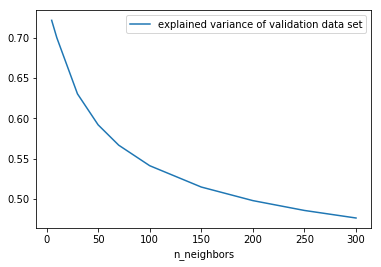

In [369]:
plt.plot(var_knn_val[..., 0], var_knn_val[..., 1], '-', label = 'explained variance of validation data set')
plt.xlabel('n_neighbors')
plt.legend()
plt.savefig('Figure_6')
plt.show()

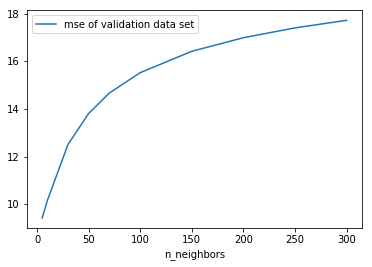

In [370]:
plt.plot(mse_knn_val[..., 0], mse_knn_val[..., 1], '-', label = 'mse of validation data set')
plt.xlabel('n_neighbors')
plt.legend()
plt.savefig('Figure_7')
plt.show()

In [67]:
model_knn = KNeighborsRegressor(n_neighbors = 5, weights = 'distance', p = 1)
model_knn_fit = model_knn.fit(X_train, y_train)
ypred_knn = model_knn_fit.predict(X_val)
mse_knn = mean_squared_error(ypred_knn, y_val)

In [68]:
print(mse_knn)

5.228396760827402


In [225]:
ypred_knn_test = model_knn_fit.predict(X_test)
mse_knn_test = mean_squared_error(ypred_knn_test, y_test)
print(mse_knn_test)

5.0586884421477345


In [351]:
var_tree_val = np.zeros([7, 2])
mse_tree_val = np.zeros([7, 2])
for i, n in enumerate([50, 100, 150, 200, 250, 300, 400]):
    var_tree_val[i, 0] = n
    mse_tree_val[i, 0] = n
    model_tree_paras = ExtraTreesRegressor(n_estimators = n, min_samples_split = 5)
    model_tree_fit_paras = model_tree_paras.fit(X_train_small, y_train_small)
    ypred_tree_val = model_tree_fit_paras.predict(X_val_small)
    var_tree_val[i, 1] = explained_variance_score(y_val_small, ypred_tree_val)
    mse_tree_val[i, 1] = mean_squared_error(y_val_small, ypred_tree_val)

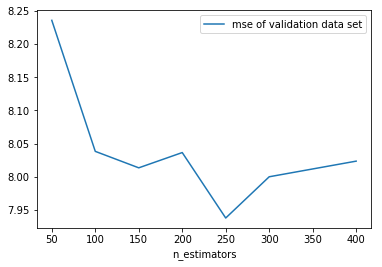

In [371]:
plt.plot(mse_tree_val[..., 0], mse_tree_val[..., 1], '-', label = 'mse of validation data set')
plt.xlabel('n_estimators')
plt.legend()
plt.savefig('Figure_8')
plt.show()

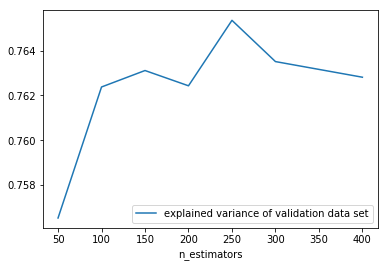

In [372]:
plt.plot(var_tree_val[..., 0], var_tree_val[..., 1], '-', label = 'explained variance of validation data set')
plt.xlabel('n_estimators')
plt.legend()
plt.savefig('Figure_9')
plt.show()

In [355]:
model_tree = ExtraTreesRegressor(n_estimators = 250, min_samples_split = 2)
model_tree_fit_all = model_tree.fit(X_train, y_train)

In [356]:
ypred_tree_all = model_tree_fit_all.predict(X_val)
mse_tree_all = mean_squared_error(ypred_tree_all, y_val)

In [357]:
print(mse_tree_all)

4.363364471642128


In [358]:
feature_tree_importance = model_tree_fit_all.feature_importances_

In [359]:
feature_bath = feature.rename(columns = {
                       'Coh_SwathOverPoca': 'Coh_SOP', 
                       'DayInYear_Swath': 'Day_Swath',
                       'Dist_SwathToPoca': 'Dist_SOP', 
                       'Heading_Swath': 'Head_Swath',
                       'LeadEdgeS_Poca': 'LeadEdgeS', 
                       'LeadEdgeW_Poca': 'LeadEdgeW',
                       'PhaseConfidence_Swath': 'PhaseCon_Swath', 
                       'PhaseSSegment_Swath': 'PhaseSSeg_Swath',
                       'Phase_SwathOverPoca': 'Phase_SOP', 
                       'PowerScaled_Swath': 'PowerS_Swath',
                       'PowerScaled_SwathOverPoca': 'PowerS_SOP', 
                       'PowerWatt_Swath': 'PowerW_Swath', 
                       'SampleNb_SwathMinusLeadEdgeS': 'SampleNb_SMS'})

In [360]:
print(sorted_idx)

[13 12 11  7  1  6 10  5  2  0  8 14  4  9  3 15]


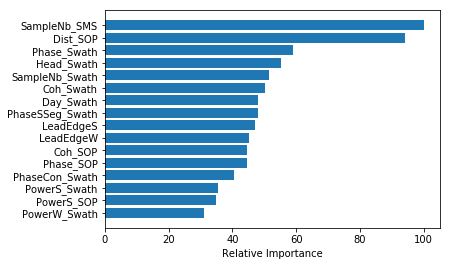

In [361]:
feature_tree_importance = 100.0 * (feature_tree_importance / feature_tree_importance.max())
sorted_idx = np.argsort(feature_tree_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_tree_importance[sorted_idx], align='center')
plt.yticks(pos, feature_bath.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.savefig('Figure_8_near')
plt.show()

In [362]:
feature_selec_tree = SelectFromModel(model_tree).fit(X_train, y_train)
feature_tree = feature_selec_tree.get_support(indices = True)
print(feature.columns[feature_tree])

Index(['Dist_SwathToPoca', 'Heading_Swath', 'Phase_Swath', 'SampleNb_Swath',
       'SampleNb_SwathMinusLeadEdgeS'],
      dtype='object')


In [363]:
X_train_tree = feature_selec_tree.transform(X_train)
X_val_tree = feature_selec_tree.transform(X_val)

In [364]:
model_tree_fit = model_tree.fit(X_train_tree, y_train)
ypred_tree = model_tree_fit.predict(X_val_tree)
mse_tree = mean_squared_error(ypred_tree, y_val)

In [365]:
print(mse_tree)

3.533165909957383


In [366]:
X_test_tree = feature_selec_tree.transform(X_test)
ypred_tree_test = model_tree_fit.predict(X_test_tree)
mse_tree_test = mean_squared_error(ypred_tree_test, y_test)
print(mse_tree_test)

3.675832983057746


In [217]:
model_ada = AdaBoostRegressor(base_estimator = model_tree, n_estimators = 100)
model_ada_fit = model_ada.fit(X_train, y_train)

In [218]:
ypred_ada = model_ada_fit.predict(X_val)
mse_ada = mean_squared_error(ypred_ada, y_val)

In [219]:
print(mse_ada)

8.499717978379508


In [213]:
model_gbrt = GradientBoostingRegressor()
model_gbrt_fit = model_gbrt.fit(X_train, y_train)

In [214]:
ypred_gbrt = model_gbrt_fit.predict(X_val)
mse_gbrt = mean_squared_error(ypred_gbrt, y_val)

In [215]:
print(mse_gbrt)

26.66289307478732


In [247]:
two_area = pd.concat([near_jako, near_south])
one_area = pd.concat([near_stor])
two_area_cle = two_area[(two_area['DemDiff_Swath']>-50)&
                      (two_area['DemDiff_Swath']<25)&
                      (two_area['DemDiff_SwathOverPoca']<100000)&
                      (two_area['MeanDiffSpread_Swath']<200)]
one_area_cle = one_area[(one_area['DemDiff_Swath']>-50)&
                      (one_area['DemDiff_Swath']<25)&
                      (one_area['DemDiff_SwathOverPoca']<100000)&
                      (one_area['MeanDiffSpread_Swath']<200)]
two_feature = two_area_cle[['Coh_Swath', 
                       'Coh_SwathOverPoca', 
                       'DayInYear_Swath',
                       'Dist_SwathToPoca', 
                       'Heading_Swath',
                       'LeadEdgeS_Poca', 
                       'LeadEdgeW_Poca',
                       'PhaseConfidence_Swath', 
                       'PhaseSSegment_Swath',
                       'Phase_Swath', 
                       'Phase_SwathOverPoca', 
                       'PowerScaled_Swath',
                       'PowerScaled_SwathOverPoca', 
                       'PowerWatt_Swath', 
                       'SampleNb_Swath',
                       'SampleNb_SwathMinusLeadEdgeS']]
one_feature = one_area_cle[['Coh_Swath', 
                       'Coh_SwathOverPoca', 
                       'DayInYear_Swath',
                       'Dist_SwathToPoca', 
                       'Heading_Swath',
                       'LeadEdgeS_Poca', 
                       'LeadEdgeW_Poca',
                       'PhaseConfidence_Swath', 
                       'PhaseSSegment_Swath',
                       'Phase_Swath', 
                       'Phase_SwathOverPoca', 
                       'PowerScaled_Swath',
                       'PowerScaled_SwathOverPoca', 
                       'PowerWatt_Swath', 
                       'SampleNb_Swath',
                       'SampleNb_SwathMinusLeadEdgeS']]
two_target = two_area_cle['Elev_Oib'] - two_area_cle['Elev_Swath']
one_target = one_area_cle['Elev_Oib'] - one_area_cle['Elev_Swath']

In [248]:
X_train = MinMaxScaler().fit_transform(np.array(two_feature))
y_train = np.array(two_target)
X_test = MinMaxScaler().fit_transform(np.array(one_feature))
y_test = np.array(one_target)

In [265]:
model_ols = LinearRegression()
model_ols_fit = model_ols.fit(X_train, y_train)
ypred_ols = model_ols_fit.predict(X_test)
mse_ols = mean_squared_error(ypred_ols, y_test)

In [266]:
print(mse_ols)

8.877037360677081e+24


In [249]:
model_tree = ExtraTreesRegressor(n_estimators = 100, min_samples_split = 2)
model_tree_fit_all = model_tree.fit(X_train, y_train)
feature_selec_tree = SelectFromModel(model_tree_fit_all, prefit = True)

In [250]:
feature_tree = feature_selec_tree.get_support(indices = True)
print(feature.columns[feature_tree])

Index(['Dist_SwathToPoca', 'Heading_Swath', 'Phase_Swath', 'SampleNb_Swath',
       'SampleNb_SwathMinusLeadEdgeS'],
      dtype='object')


In [251]:
X_train_tree = feature_selec_tree.transform(X_train)
X_test_tree = feature_selec_tree.transform(X_test)

In [252]:
model_tree_fit = model_tree.fit(X_train_tree, y_train)
ypred_tree = model_tree_fit.predict(X_test_tree)
mse_tree = mean_squared_error(ypred_tree, y_test)

In [253]:
print(mse_tree)

32.118905888381484


In [270]:
jako_time = pd.concat([near_jako_11, near_jako_12, near_jako_13, 
                      near_jako_14, near_jako_15])
south_time = pd.concat([near_south_11, near_south_12, near_south_13, 
                       near_south_14, near_south_15])
stor_time = pd.concat([near_stor_11, near_stor_12, near_stor_13, 
                      near_stor_14, near_stor_15])
near_time = pd.concat([jako_time, south_time, stor_time])
near_16 = pd.concat([near_jako_16, near_south_16, near_stor_16])
near_time_cle = near_time[(near_time['DemDiff_Swath']>-50)&
                      (near_time['DemDiff_Swath']<25)&
                      (near_time['DemDiff_SwathOverPoca']<100000)&
                      (near_time['MeanDiffSpread_Swath']<200)]
near_16_cle = near_16[(near_16['DemDiff_Swath']>-50)&
                      (near_16['DemDiff_Swath']<25)&
                      (near_16['DemDiff_SwathOverPoca']<100000)&
                      (near_16['MeanDiffSpread_Swath']<200)]
neartime_feature = near_time_cle[['Coh_Swath', 
                       'Coh_SwathOverPoca', 
                       'DayInYear_Swath',
                       'Dist_SwathToPoca', 
                       'Heading_Swath',
                       'LeadEdgeS_Poca', 
                       'LeadEdgeW_Poca',
                       'PhaseConfidence_Swath', 
                       'PhaseSSegment_Swath',
                       'Phase_Swath', 
                       'Phase_SwathOverPoca', 
                       'PowerScaled_Swath',
                       'PowerScaled_SwathOverPoca', 
                       'PowerWatt_Swath', 
                       'SampleNb_Swath',
                       'SampleNb_SwathMinusLeadEdgeS']]
near16_feature = near_16_cle[['Coh_Swath', 
                       'Coh_SwathOverPoca', 
                       'DayInYear_Swath',
                       'Dist_SwathToPoca', 
                       'Heading_Swath',
                       'LeadEdgeS_Poca', 
                       'LeadEdgeW_Poca',
                       'PhaseConfidence_Swath', 
                       'PhaseSSegment_Swath',
                       'Phase_Swath', 
                       'Phase_SwathOverPoca', 
                       'PowerScaled_Swath',
                       'PowerScaled_SwathOverPoca', 
                       'PowerWatt_Swath', 
                       'SampleNb_Swath',
                       'SampleNb_SwathMinusLeadEdgeS']]
neartime_target = near_time_cle['Elev_Oib'] - near_time_cle['Elev_Swath']
near16_target = near_16_cle['Elev_Oib'] - near_16_cle['Elev_Swath']

In [271]:
X_train_time = MinMaxScaler().fit_transform(np.array(neartime_feature))
y_train_time = np.array(neartime_target)
X_test_time = MinMaxScaler().fit_transform(np.array(near16_feature))
y_test_time = np.array(near16_target)

In [272]:
model_ols = LinearRegression()
model_ols_fit = model_ols.fit(X_train_time, y_train_time)
ypred_ols = model_ols_fit.predict(X_test_time)
mse_ols = mean_squared_error(ypred_ols, y_test_time)

In [273]:
print(mse_ols)

36.1400420295924


In [256]:
model_tree = ExtraTreesRegressor(n_estimators = 100, min_samples_split = 2)
model_tree_fit_alltime = model_tree.fit(X_train_time, y_train_time)
feature_selec_tree_time = SelectFromModel(model_tree_fit_alltime, prefit = True)

In [257]:
feature_tree_time = feature_selec_tree_time.get_support(indices = True)
print(feature.columns[feature_tree_time])

Index(['Dist_SwathToPoca', 'Heading_Swath', 'Phase_Swath', 'SampleNb_Swath',
       'SampleNb_SwathMinusLeadEdgeS'],
      dtype='object')


In [258]:
X_train_tree_time = feature_selec_tree_time.transform(X_train_time)
X_test_tree_time = feature_selec_tree_time.transform(X_test_time)

In [259]:
model_tree_fit = model_tree.fit(X_train_tree_time, y_train_time)
ypred_tree_time = model_tree_fit.predict(X_test_tree_time)
mse_tree_time = mean_squared_error(ypred_tree_time, y_test_time)

In [260]:
print(mse_tree_time)

39.16428305280212
